#Tugas 9 Desain Analisis dan Algoritma


**Nama** : Azisya Luthfi Bintang

**NIM** : 2022071051

---
###Mencoba Code dalam PPT

*Latihan ada di bawahnya

In [36]:
#page rank dengan 100 iterasi berdasarkab data adjacency matrix,
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        # Calculate the pagerank contribution from each linking page
        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_pages:
            new_page_rank[j] += page_rank[linking_page] / np.sum(adjacency_matrix[linking_page, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(page {page + 1}) = {rank:.3f}")


PR(page 1) = 0.122
PR(page 2) = 0.302
PR(page 3) = 0.378
PR(page 4) = 0.198


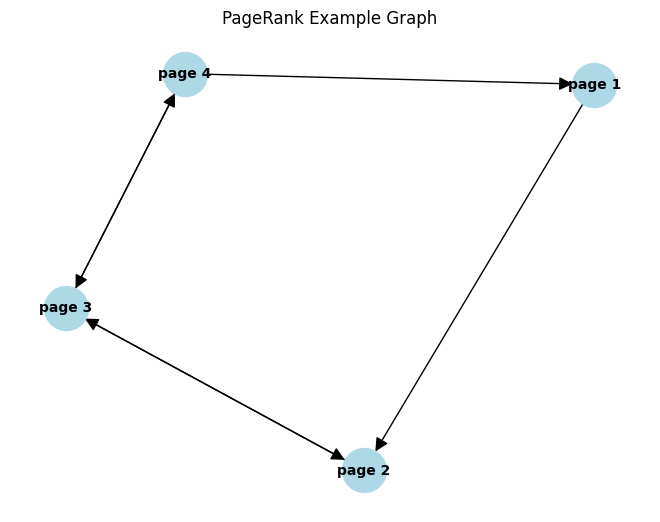

In [37]:
#membuat graph dari adjacency matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Create the directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)  # Layout the graph
labels = {i: f"page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()


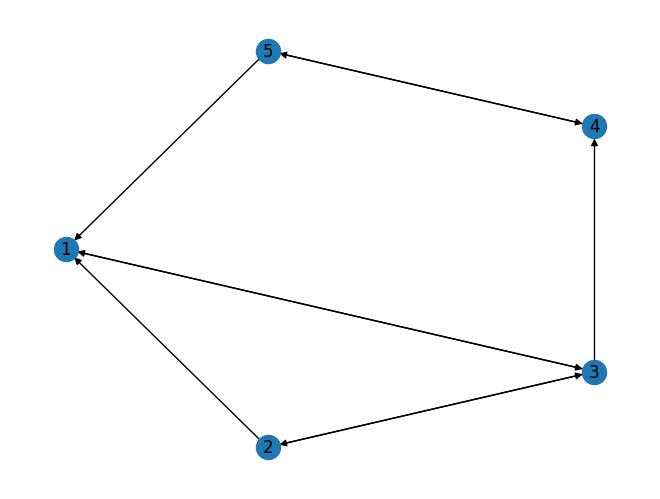

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
myWeb = nx.DiGraph()
myPages = range(1,5)
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [109]:
#implementasu algoritma pagerank

import networkx as nx
import numpy as np

def CreatPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

#contoh penggunaan
myWeb = nx.DiGraph()
connections = [(1,3), (2,1), (2,3), (3,1), (3,2), (3,4), (4,5), (5,1), (5,4)]
myWeb.add_edges_from(connections)

G, p = CreatPageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [40]:
# studi kasus 2
import numpy as np

adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0],
                             [1, 0, 0, 0, 0],
                             [0, 0, 1, 1, 0],
                             [0, 0, 1, 1, 0]])

pagerank = np.array([1, 1, 1, 1, 1], dtype=float)
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_pagerank = np.zeros(pagerank.shape, dtype=float)

    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            # hitung jumlah tautan keluar dari halaman i
            num_outlinks = np.sum(adjacency_matrix[i, :])

            if num_outlinks > 0:
                new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

    # normalisasi pagerank
    new_pagerank += (1 - damping_factor) / len(pagerank)

    # perbarui nilai pagerank
    pagerank = new_pagerank

# hasil pagerank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [163]:
import numpy as np
#jumlah halaman
num_pages = 5
#vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])
# vectors og inlinks
inlinks = np.array([1, 2, 1, 2, 1])
#inisiasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages
#faktor damping
damping_factor = 0.85
#jumlah iterasi
num_iteration = 100

for _ in range(num_iteration):
    #inisiasi PageRank baru
    new_pagerank = np.zeros(num_pages, dtype=float)
    for i in range(num_pages):
        for j in range(num_pages):
            if i != j and outlinks[j] > 0:
                new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

    #terapkan faktor damping dan tambahkan nilai konstan
    pagerank = (i - damping_factor) / num_pages + new_pagerank

# hasil pagerank
print("hasil PageRank:")
for i, pr in enumerate(pagerank):
    print(f"Halaman{chr(ord('A')+i)}: {pr:.4f}")

hasil PageRank:
HalamanA: 1497745420275797485334560768.0000
HalamanB: 1405256779686897376940785664.0000
HalamanC: 1185614837085228727600676864.0000
HalamanD: 1405256779686897376940785664.0000
HalamanE: 1405256779686897376940785664.0000


---
###Latihan

1. Hitung Page Rank dari network tersebut (tentukan dahulu matrix atau connection sebagai data input)
2. Gambar graph dari network tersebut

In [164]:
def calPageRank(connections, damping_factor=0.85, num_iterations=100):
    num_pages = max(max(connections, key=lambda x: max(x)))

    adjacency_matrix = np.zeros((num_pages, num_pages))

    for connection in connections:
        adjacency_matrix[connection[0] - 1, connection[1] - 1] = 1

    page_rank = np.ones(num_pages) / num_pages

    for _ in range(num_iterations):
        new_page_rank = np.zeros(num_pages)
        for j in range(num_pages):
            linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
            for linking_page in linking_pages:
                new_page_rank[j] += page_rank[linking_page] / np.sum(adjacency_matrix[linking_page, :])
            new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
        page_rank = new_page_rank

    return page_rank

In [171]:
def gambarGraf(connections, pagerank):
    G = nx.DiGraph()
    G.add_edges_from(connections)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, font_color='black', font_weight='bold', arrowsize=20)

    # Tambahkan label PageRank ke setiap node
    labels = {i+1: f'\n\npr={round(pr, 4)}' for i, pr in enumerate(pagerank)}
    nx.draw_networkx_labels(G, pos, labels, font_color='red', font_size=10)

    plt.show()

---
**Latihan 1**

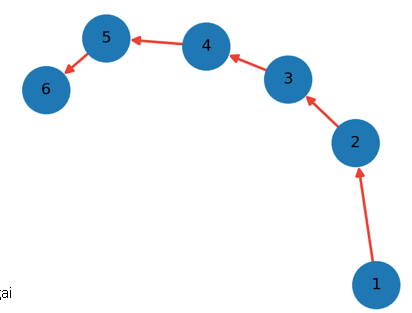

PR(page 1) = 0.025
PR(page 2) = 0.046
PR(page 3) = 0.064
PR(page 4) = 0.080
PR(page 5) = 0.093
PR(page 6) = 0.104


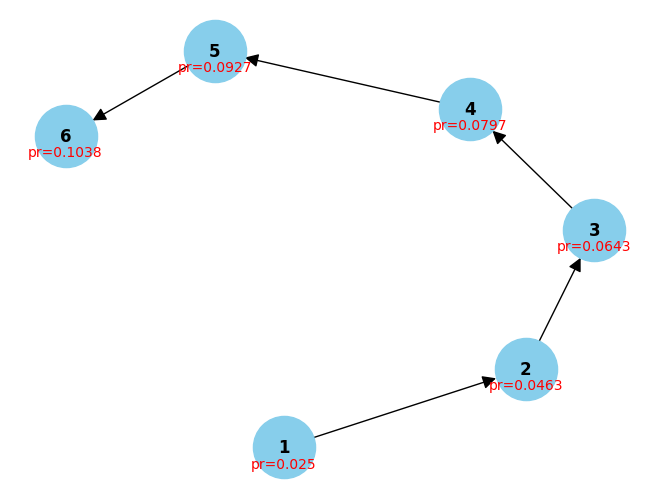

In [172]:
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5,6)]
pr = calPageRank(connections)
for page, rank in enumerate(pr):
        print(f"PR(page {page + 1}) = {rank:.3f}")

gambarGraf(connections, pr)

---
**Latihan 2**

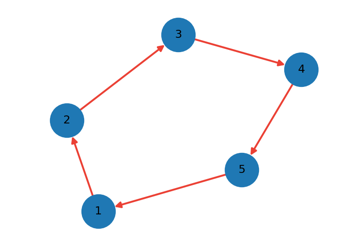

PR(page 1) = 0.200
PR(page 2) = 0.200
PR(page 3) = 0.200
PR(page 4) = 0.200
PR(page 5) = 0.200


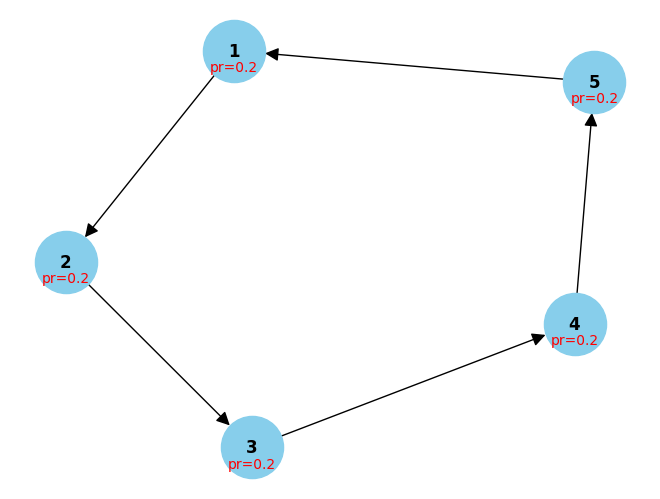

In [173]:
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5,1)]
pr = calPageRank(connections)
for page, rank in enumerate(pr):
        print(f"PR(page {page + 1}) = {rank:.3f}")

gambarGraf(connections, pr)

---
**Latihan 3**
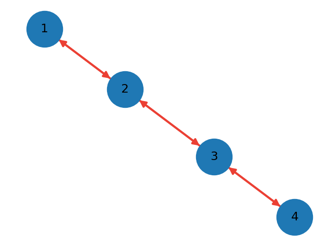

PR(page 1) = 0.175
PR(page 2) = 0.325
PR(page 3) = 0.325
PR(page 4) = 0.175


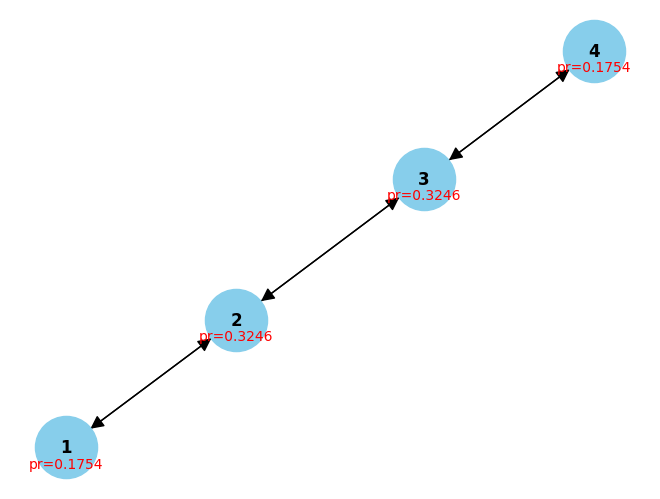

In [176]:
connections = [(1,2), (2,1), (2,3), (3,2), (3,4), (4,3)]
pr = calPageRank(connections)
for page, rank in enumerate(pr):
        print(f"PR(page {page + 1}) = {rank:.3f}")

gambarGraf(connections, pr)

---
**Latihan 4**

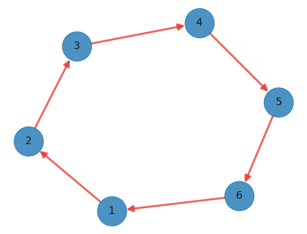

PR(page 1) = 0.167
PR(page 2) = 0.167
PR(page 3) = 0.167
PR(page 4) = 0.167
PR(page 5) = 0.167
PR(page 6) = 0.167


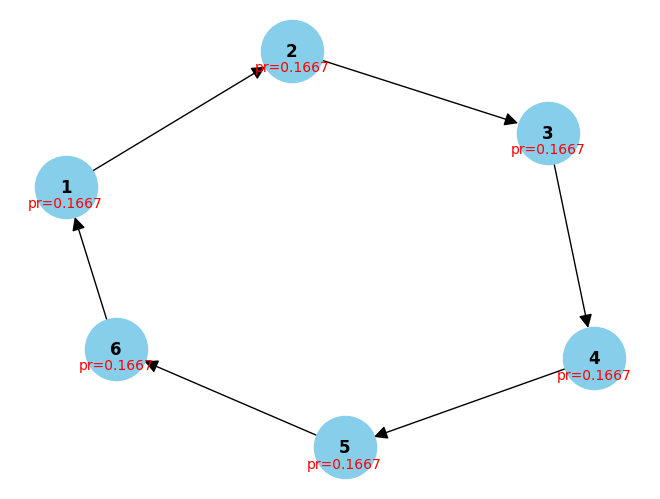

In [179]:
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5,6), (6,1)]
pr = calPageRank(connections)
for page, rank in enumerate(pr):
        print(f"PR(page {page + 1}) = {rank:.3f}")

gambarGraf(connections, pr)

---
**Latihan 5**

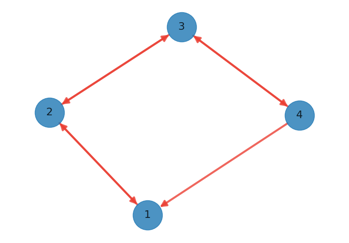

PR(page 1) = 0.250
PR(page 2) = 0.356
PR(page 3) = 0.250
PR(page 4) = 0.144


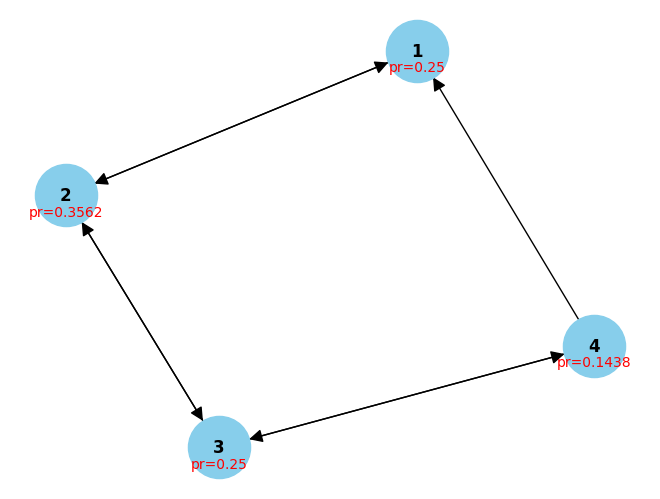

In [183]:
connections = [(1, 2), (2, 1), (2, 3), (3, 2), (3,4), (4,3), (4,1)]
pr = calPageRank(connections)
for page, rank in enumerate(pr):
        print(f"PR(page {page + 1}) = {rank:.3f}")

gambarGraf(connections, pr)

---
**Latihan 6**

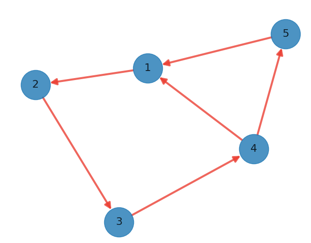

PR(page 1) = 0.225
PR(page 2) = 0.221
PR(page 3) = 0.218
PR(page 4) = 0.215
PR(page 5) = 0.121


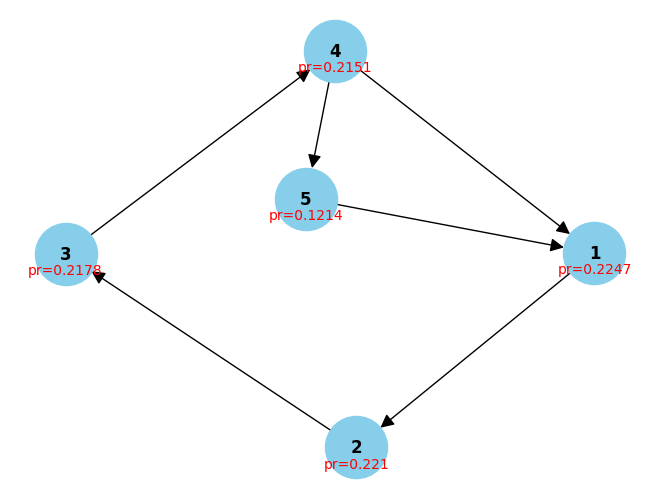

In [187]:
connections = [(1,2), (2,3),(3,4), (4,1), (4,5), (5,1)]
pr = calPageRank(connections)
for page, rank in enumerate(pr):
        print(f"PR(page {page + 1}) = {rank:.3f}")

gambarGraf(connections, pr)

---
**Latihan 7**

1. Buatlah Connection Bebas
2. Hitung Pagerank dari network yang sudah dibuat
3. Gambar Graph dari network tersebut ?

PR(page 1) = 0.269
PR(page 2) = 0.224
PR(page 3) = 0.189
PR(page 4) = 0.224
PR(page 5) = 0.094


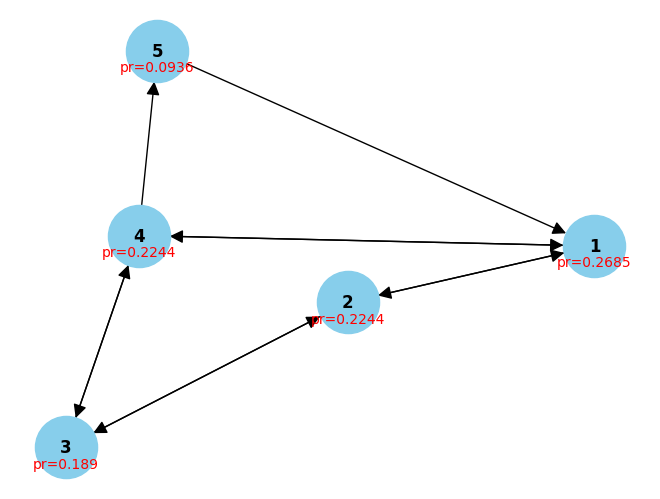

In [226]:
#Connection yang saya buat
connections = [(1,2), (2,1), (2,3), (3,2), (3,4), (4,3), (4,1), (1,4), (4,5), (5,1)]

pr = calPageRank(connections)

#Menghitung Pagerank
for page, rank in enumerate(pr):
        print(f"PR(page {page + 1}) = {rank:.3f}")

#Menampilkan graf
gambarGraf(connections, pr)